# Analyse des données

In [119]:
# On commence par réaliser les importations nécessaires et 
# accéder à nos données
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("data/merged_data.csv")

## 1 - Connaître nos produits

### 1.1 - Répartition des prix de vente des produits

Une bonne première étape est d'étudier la répartition des prix pratiqués par notre librairie en ligne (on considérera ici que les prix de la colonne 'price' sont exprimés en euros) :

Prix moyen : 17.21518851366
Prix médian : 13.9
Écart type : 17.855445377654487
Premier et troisième quartiles :
8.61
18.99


<AxesSubplot:xlabel='price'>

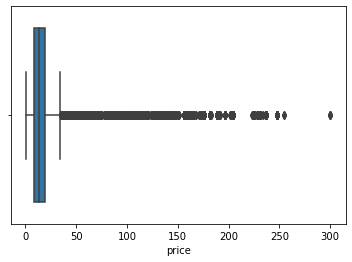

In [2]:
# On affiche les indicateurs statistiques pertinents pour nos données :
print(f"Prix moyen : {data['price'].mean()}")
print(f"Prix médian : {data['price'].median()}")
print(f"Écart type : {data['price'].std()}")
quantiles = data["price"].quantile([0.25, 0.75])
print("Premier et troisième quartiles :")
for row in quantiles:
    print(row)

# On crée ensuite une boîte à moustaches pour mieux visualiser la 
# répartition des données

sns.boxplot(x=data["price"])


À partir de ces résultats, on peut faire plusieurs observations :
- La grande majorité des livres ont un prix compris entre 10 et 20 euros environ
- Bien que le prix de certains livres atteigne 300 euros, ceux-ci sont très largement minoritaires
- Il s'ensuit que le prix médian des livres représente une meilleure indication que le prix moyen, celui-ci étant fortement influencé par quelques valeurs extrêmes (17,22 € pour le prix moyen, contre 13,90 € pour le prix médian).

## 2 - Connaître nos clients

### 2.1 - Répartition des sexes des clients

Il est important pour une entreprise de connaître ses clients. C'est pourquoi nous allons nous attacher ici à étudier la répartition des sexes de nos clients :

<AxesSubplot:xlabel='sex', ylabel='Count'>

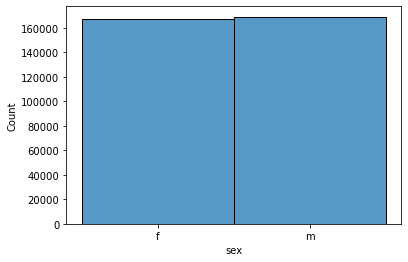

In [3]:
# On affiche un histogramme qui donne le nombre d'hommes et de femmes parmi nos clients
sns.histplot(data=data, x="sex")

On ne constate aucune tendance marquée en ce qui concerne le sexe de nos clients : notre marque semble plaire aux hommes aussi bien qu'aux femmes.

### 2.2 - Répartition de l'âge des clients

De la même manière, nous allons ici étudier l'âge de nos clients afin de voir si notre librairie attire certaines tranches d'âge plus que d'autres.

<AxesSubplot:xlabel='age', ylabel='Count'>

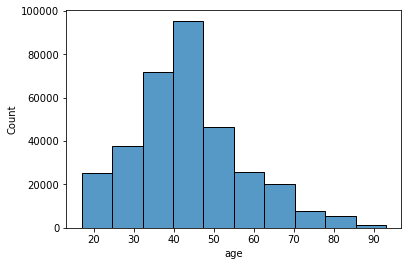

In [120]:
# Pour commencer, nous allons créer une colonne qui répertorie l'âge
# de nos clients - nous ne disposons que de leurs dates de naissances
# en l'état

def get_age(row):
    """Cette fonction calcule l'âge d'un client au moment de sa commande
    en se basant sur sa date de naissance et la date de la commande"""
    
    birth_year = row["birth"]
    order_year = int(row["date"][0:4])
    age = order_year - birth_year
    return age

data["age"] = data.apply(lambda row: get_age(row), axis=1)

# On affiche ensuite un histogramme qui montre l'âge de nos clients :
sns.histplot(data["age"], bins=10)

On constate que beaucoup de nos clients ont la quarantaine. Les clients ayant moins de 20 ans ou plus de 60 ans sont quant à eux minoritaires.

### 2.3 - Répartition des montants de panier

Plutôt que d'étudier le montant des ventes au travers de chaque article vendu, il paraît plus pertinent d'étudier le montant total des paniers des clients. Le code ci-dessous trie toutes les données par commande, puis trace une courbe de Lorenz qui nous permettra de voir la répartition des montants des paniers.

In [18]:
# Pour commencer, on crée une dataframe qui nous donne, pour chaque commande
# (une session_id correspond à une session d'un utilisateur sur notre site,
# et donc à une commande) le montant total de la commande, ainsi que le sexe
# et l'âge de l'acheteur.

user_sessions = pd.DataFrame(columns=["session_id", "price", "sex", "age"])

unique_session_ids = data["session_id"].unique()
print(f"{len(unique_session_ids)} IDs to process")
processed_ids_count = 0

for id in unique_session_ids:
    relevant_rows = data[data["session_id"] == id]
    total_price = relevant_rows["price"].sum()
    sex = relevant_rows.iloc[0]["sex"]
    age = relevant_rows.iloc[0]["age"]
    
    new_row = pd.DataFrame({"session_id" : [id],
                            "price" : [total_price],
                           "sex" : [sex],
                           "age" : [age]})
    user_sessions = pd.concat([user_sessions, new_row])
    
    processed_ids_count += 1
    if processed_ids_count % 100 == 0 : print(f"{processed_ids_count} IDs processed")

# On enregistre ensuite la dataframe créée dans un fichier csv,
# pour ne pas le perdre
user_sessions.to_csv("data/user_sessions.csv")
    
        

169173 IDs to process
100 IDs processed
200 IDs processed
300 IDs processed
400 IDs processed
500 IDs processed
600 IDs processed
700 IDs processed
800 IDs processed
900 IDs processed
1000 IDs processed
1100 IDs processed
1200 IDs processed
1300 IDs processed
1400 IDs processed
1500 IDs processed
1600 IDs processed
1700 IDs processed
1800 IDs processed
1900 IDs processed
2000 IDs processed
2100 IDs processed
2200 IDs processed
2300 IDs processed
2400 IDs processed
2500 IDs processed
2600 IDs processed
2700 IDs processed
2800 IDs processed
2900 IDs processed
3000 IDs processed
3100 IDs processed
3200 IDs processed
3300 IDs processed
3400 IDs processed
3500 IDs processed
3600 IDs processed
3700 IDs processed
3800 IDs processed
3900 IDs processed
4000 IDs processed
4100 IDs processed
4200 IDs processed
4300 IDs processed
4400 IDs processed
4500 IDs processed
4600 IDs processed
4700 IDs processed
4800 IDs processed
4900 IDs processed
5000 IDs processed
5100 IDs processed
5200 IDs processed

41500 IDs processed
41600 IDs processed
41700 IDs processed
41800 IDs processed
41900 IDs processed
42000 IDs processed
42100 IDs processed
42200 IDs processed
42300 IDs processed
42400 IDs processed
42500 IDs processed
42600 IDs processed
42700 IDs processed
42800 IDs processed
42900 IDs processed
43000 IDs processed
43100 IDs processed
43200 IDs processed
43300 IDs processed
43400 IDs processed
43500 IDs processed
43600 IDs processed
43700 IDs processed
43800 IDs processed
43900 IDs processed
44000 IDs processed
44100 IDs processed
44200 IDs processed
44300 IDs processed
44400 IDs processed
44500 IDs processed
44600 IDs processed
44700 IDs processed
44800 IDs processed
44900 IDs processed
45000 IDs processed
45100 IDs processed
45200 IDs processed
45300 IDs processed
45400 IDs processed
45500 IDs processed
45600 IDs processed
45700 IDs processed
45800 IDs processed
45900 IDs processed
46000 IDs processed
46100 IDs processed
46200 IDs processed
46300 IDs processed
46400 IDs processed


82500 IDs processed
82600 IDs processed
82700 IDs processed
82800 IDs processed
82900 IDs processed
83000 IDs processed
83100 IDs processed
83200 IDs processed
83300 IDs processed
83400 IDs processed
83500 IDs processed
83600 IDs processed
83700 IDs processed
83800 IDs processed
83900 IDs processed
84000 IDs processed
84100 IDs processed
84200 IDs processed
84300 IDs processed
84400 IDs processed
84500 IDs processed
84600 IDs processed
84700 IDs processed
84800 IDs processed
84900 IDs processed
85000 IDs processed
85100 IDs processed
85200 IDs processed
85300 IDs processed
85400 IDs processed
85500 IDs processed
85600 IDs processed
85700 IDs processed
85800 IDs processed
85900 IDs processed
86000 IDs processed
86100 IDs processed
86200 IDs processed
86300 IDs processed
86400 IDs processed
86500 IDs processed
86600 IDs processed
86700 IDs processed
86800 IDs processed
86900 IDs processed
87000 IDs processed
87100 IDs processed
87200 IDs processed
87300 IDs processed
87400 IDs processed


122400 IDs processed
122500 IDs processed
122600 IDs processed
122700 IDs processed
122800 IDs processed
122900 IDs processed
123000 IDs processed
123100 IDs processed
123200 IDs processed
123300 IDs processed
123400 IDs processed
123500 IDs processed
123600 IDs processed
123700 IDs processed
123800 IDs processed
123900 IDs processed
124000 IDs processed
124100 IDs processed
124200 IDs processed
124300 IDs processed
124400 IDs processed
124500 IDs processed
124600 IDs processed
124700 IDs processed
124800 IDs processed
124900 IDs processed
125000 IDs processed
125100 IDs processed
125200 IDs processed
125300 IDs processed
125400 IDs processed
125500 IDs processed
125600 IDs processed
125700 IDs processed
125800 IDs processed
125900 IDs processed
126000 IDs processed
126100 IDs processed
126200 IDs processed
126300 IDs processed
126400 IDs processed
126500 IDs processed
126600 IDs processed
126700 IDs processed
126800 IDs processed
126900 IDs processed
127000 IDs processed
127100 IDs pr

161500 IDs processed
161600 IDs processed
161700 IDs processed
161800 IDs processed
161900 IDs processed
162000 IDs processed
162100 IDs processed
162200 IDs processed
162300 IDs processed
162400 IDs processed
162500 IDs processed
162600 IDs processed
162700 IDs processed
162800 IDs processed
162900 IDs processed
163000 IDs processed
163100 IDs processed
163200 IDs processed
163300 IDs processed
163400 IDs processed
163500 IDs processed
163600 IDs processed
163700 IDs processed
163800 IDs processed
163900 IDs processed
164000 IDs processed
164100 IDs processed
164200 IDs processed
164300 IDs processed
164400 IDs processed
164500 IDs processed
164600 IDs processed
164700 IDs processed
164800 IDs processed
164900 IDs processed
165000 IDs processed
165100 IDs processed
165200 IDs processed
165300 IDs processed
165400 IDs processed
165500 IDs processed
165600 IDs processed
165700 IDs processed
165800 IDs processed
165900 IDs processed
166000 IDs processed
166100 IDs processed
166200 IDs pr

Remarque - le bloc de code ci-dessus est long à exécuter (environ une heure). Si vous souhaitez utiliser les données qu'il a générées, vous pouvez exécuter le bloc de code ci-dessous qui vous donnera directement la dataframe ainsi créée :

In [10]:
user_sessions = pd.read_csv("data/user_sessions.csv")

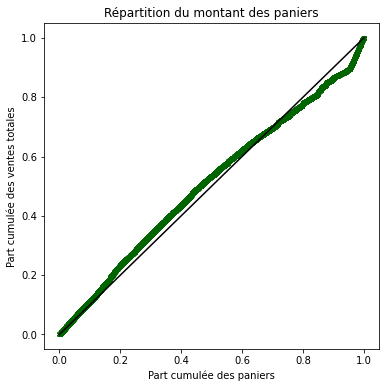

<Figure size 432x288 with 0 Axes>

In [11]:
# On peut maintenant tracer la courbe de Lorenz qui montre 
# la répartition des montants des paniers

def plot_lorenz(data, xlabel, ylabel, title):
    """data doit être un numpy.array"""
    data = data[1:]
    X_lorenz = data.cumsum() / data.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0)

    fig, ax = plt.subplots(figsize=[6,6])
    ## scatter plot of Lorenz curve
    ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
               marker='x', color='darkgreen', s=10)
    ## line plot of equality
    ax.plot([0,1], [0,1], color='k')


    # set the labels for x, y, and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title) 

    plt.show()

    # save plot as png file
    plt.savefig('population-lorenz.png', dpi = 200)

plot_lorenz(np.array(user_sessions["price"]), xlabel="Part cumulée des paniers", 
            ylabel="Part cumulée des ventes totales",
           title="Répartition du montant des paniers")

Sur cette courbe, on peut constater que les montants des paniers se répartissent de manière quasiment homogène. Comparons cela avec la courbe qui représente la répartition des ventes prises individuellement (1 vente = 1 article vendu) :

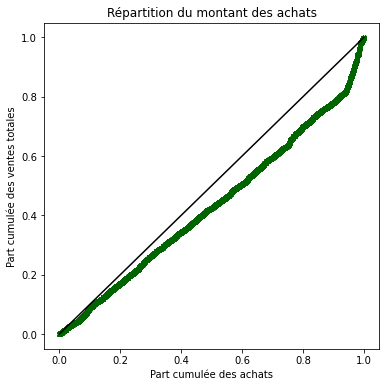

<Figure size 432x288 with 0 Axes>

In [12]:
plot_lorenz(np.array(data["price"]), xlabel="Part cumulée des achats", 
            ylabel="Part cumulée des ventes totales",
           title="Répartition du montant des achats")

On constate ici que les ventes totales sont tirées vers le haut par une minorité d'achats sur les articles les plus chers.

## 3 - Liens entre la démographie de nos clients et le montant de leur panier

Maintenant que nous avons une meilleure idée de la démographie de nos clients, nous pouvons confronter les données les concernant avec le montant des ventes. L'objectif sera ici de découvrir s'il y a une corrélation entre l'âge des clients et le montant qu'ils dépensent pour une commande.

### 3.1 - Montant des paniers en fonction de l'âge du client

Représentons d'abord les ventes totales réalisées pour chaque tranche d'âge (on prendra ici en compte le panier total, et pas les ventes d'articles prises individuellement)

Text(0, 0.5, 'Montant du panier')

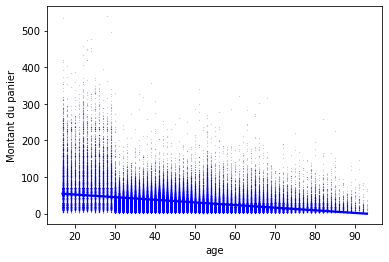

In [79]:
sns.regplot(data=user_sessions, x="age", y="price", scatter_kws={'s': 0.01, 'facecolor' : 'red'}, color="blue")
plt.ylabel("Montant du panier")

(La courbe représentée en bleu montre l'évolution générale du montant du panier en fonction de l'âge du client)
On remarque ici que le montant du panier tend à diminuer avec l'âge du client. Autrement dit, nos jeunes clients achètent plus ! On constate notamment un pic particulièrement marqué chez les 20-30 ans.

Réalisons maintenant la même analyse en séparant les différentes catégories de produits :

In [13]:
# Faire un graphique par catégorie (âge en abscisse, price en ordonnées)

print(data["categ"].unique())

[0 1 2]


Text(0, 0.5, 'Montant des ventes')

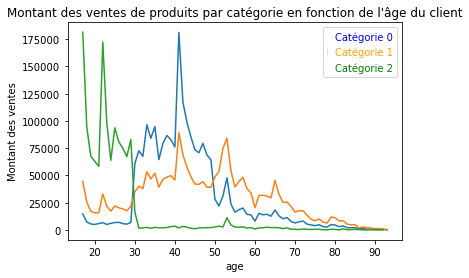

In [146]:
# Comme on a trois catégories différentes, on va créer trois dataframes
# séparés, un par catégorie, ce qui nous permettra de générer trois 
# graphiques distincts

categ_0 = data[data["categ"] == 0]
categ_1 = data[data["categ"] == 1]
categ_2 = data[data["categ"] == 2]

# On groupe les ventes par âge sur chaque dataframe :
categ_0 = categ_0.groupby(["age"]).sum(numeric_only = True)
categ_1 = categ_1.groupby(["age"]).sum(numeric_only = True)
categ_2 = categ_2.groupby(["age"]).sum(numeric_only = True)

# Graphique pour la catégorie 0 :
sns.lineplot(data=categ_0, x=categ_0.index, y="price")
# Graphique pour la catégorie 1 :
sns.lineplot(data=categ_1, x=categ_1.index, y="price")
# Graphique pour la catégorie 2 :
sns.lineplot(data=categ_2, x=categ_2.index, y="price").set(title="Montant des ventes de produits par catégorie en fonction de l'âge du client")
plt.legend(labels=["Catégorie 0","Catégorie 1", "Catégorie 2"], labelcolor=["blue", "orange", "green"], handlelength=0)
plt.ylabel("Montant des ventes")


### 3.2 - Montant des ventes par sexe pour chaque catégorie

Réalisons maintenant la même analyse par sexe :

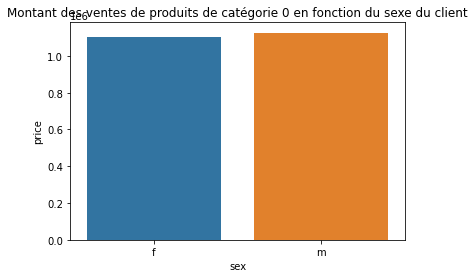

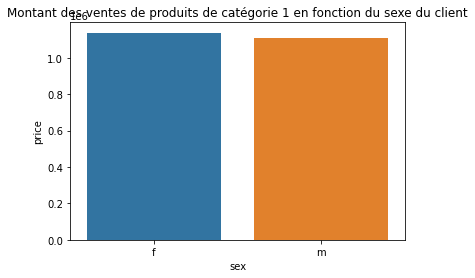

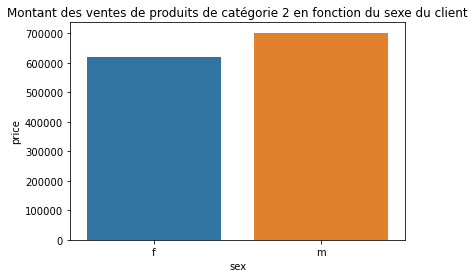

In [62]:
categ_0_by_gender = data[data["categ"] == 0]
categ_1_by_gender = data[data["categ"] == 1]
categ_2_by_gender = data[data["categ"] == 2]

# On groupe les ventes par sexe sur chaque dataframe :
categ_0_by_gender = categ_0_by_gender.groupby(["sex"]).sum(numeric_only = True)
categ_1_by_gender = categ_1_by_gender.groupby(["sex"]).sum(numeric_only = True)
categ_2_by_gender = categ_2_by_gender.groupby(["sex"]).sum(numeric_only = True)

# Graphique pour la catégorie 0 :
sns.barplot(data=categ_0_by_gender, x=categ_0_by_gender.index, y="price").set(title="Montant des ventes de produits de catégorie 0 en fonction du sexe du client")
plt.show()
# Graphique pour la catégorie 1 :
sns.barplot(data=categ_1_by_gender, x=categ_1_by_gender.index, y="price").set(title="Montant des ventes de produits de catégorie 1 en fonction du sexe du client")
plt.show()
# Graphique pour la catégorie 2 :
sns.barplot(data=categ_2_by_gender, x=categ_2_by_gender.index, y="price").set(title="Montant des ventes de produits de catégorie 2 en fonction du sexe du client")
plt.show()

On constate que les produits de catégorie 2 sont globalement un peu plus vendus à des hommes qu'à des femmes. En ce qui concerne les deux autres catégories, les acheteurs sont aussi bien des hommes que des femmes.

## 4 - Évolution des ventes dans le temps

### 4.1 - Montant des ventes par mois

Évaluons maintenant l'évolution du montant total de nos ventes au cours du temps, mois par mois.

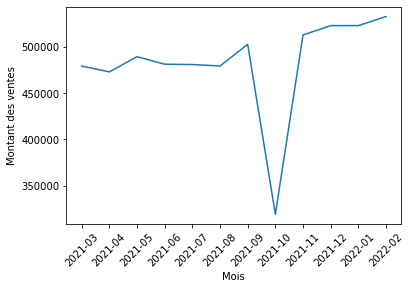

In [85]:
year_month = data["date"].apply(lambda x: x[:7])
data["year_month"] = year_month
sales_per_date = data.groupby(["year_month"]).sum(numeric_only=True)
sns.lineplot(data=sales_per_date, x=sales_per_date.index, y="price")
plt.xticks(rotation=45)
plt.xlabel("Mois")
plt.ylabel("Montant des ventes")
plt.show()


On remarque ici que nos ventes ont globalement augmenté depuis mars 2021. La seule exception est le mois d'octobre 2021, où l'on observe une diminution brusque des ventes de presque 40 %. Nous n'avons à l'heure actuelle pas pu trouver d'explications à ce phénomène. Une enquête approfondie serait donc utile pour déterminer les causes de cette diminution.

### 4.2 - Montant des ventes en fonction de l'heure de la journée

Étudier les habitudes d'achat de nos clients au cours de la journée est vital. Un aspect important du e-marketing est notamment de s'assurer que nos prospects visionnent nos publicités en ligne au bon moment de la journée, lorsqu'ils sont disposés à faire des achats. C'est dans cette optique que nous allons maintenant étudier le montant des achats réalisés par nos clients au cours de la journée.

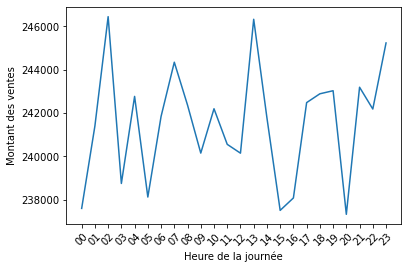

In [78]:
day_sales = data["date"].apply(lambda x: x[11:13])
data["day_sales"] = day_sales
day_sales = data.groupby(["day_sales"]).sum(numeric_only=True)
sns.lineplot(data=day_sales, x=day_sales.index, y="price")
plt.xticks(rotation=45)
plt.xlabel("Heure de la journée")
plt.ylabel("Montant des ventes")
plt.show()

On ne constate pas de différence significative dans le montant des ventes réalisées selon l'heure de la journée. Cette homogénéité peut s'expliquer par le fait que tous les clients ne sont pas forcément sur le même fuseau horaire, ce qui tendrait à "lisser" le montant des commandes sur 24 heures.

## 5 - Analyse approfondie et questionnements supplémentaires - NON TERMINÉ

### 5.1 - Corrélation entre le sexe des clients et les catégories des produits achetés

Cette corrélation a déjà été évoquée dans la section 3.2. Nous avions alors constaté qu'il ne semblait pas exister de corrélation entre les catégories des produits achetés et le sexe des clients, à l'exception peut-être de la catégorie 2 où l'on observe une légère différence dans le montant des ventes réalisées par des hommes et des femmes. Nous allons ici réaliser une étude plus approfondie des relations entre ces valeurs.

In [145]:
# Commençons par afficher la table de contingence qui étudie les
# relations entre le sexe des clients et le montant total des
# ventes réalisées par les personnes de ce sexe

tab_df = data.groupby(["categ", "sex"]).sum(numeric_only=True)
tab_df.drop(columns=["birth", "price", "age"], inplace=True)
print(tab_df)
tab_df = tab_df.reset_index("sex")
tab_df = tab_df.reset_index("categ")
print(tab_df)

X = "categ"
Y = "sex"
    
table = tab_df[[X, Y]].pivot_table(index=X, columns=Y, values=tab_df["0"], aggfunc=len, margins=True, margins_name="Total")
#pd.crosstab(index=tab_df.index, columns=tab_df["sex"])
print(table)

            Unnamed: 0
categ sex             
0     f    17460960878
      m    17813214939
1     f     8376910236
      m     8196066673
2     f     2278390175
      m     2562110927
   categ sex   Unnamed: 0
0      0   f  17460960878
1      0   m  17813214939
2      1   f   8376910236
3      1   m   8196066673
4      2   f   2278390175
5      2   m   2562110927


KeyError: '0'

## 5.2 - Corrélations relatives à l'âge des clients

### 5.2.1 - Corrélation entre l'âge des clients et le montant total des achats

Comme nous l'avons vu dans la section 3.1, il semble y avoir une corrélation négative entre l'âge des clients et le montant total de leur panier. Autrement dit, le montant du panier tend à diminuer lorsque l'âge du client augmente.

### 5.2.2 - Corrélation entre l'âge des clients et la fréquence d'achat

### 5.2.3 - Corrélation entre l'âge des clients et la taille du panier moyen en nombre d'articles

### 5.2.4 - Corrélation entre l'âge des clients et les catégories de produit achetées